**Nama : Arya Wicaksana Hidayat**

**Kelas : TI-3F**

**Absen : 07**

# Praktikum 1

**Langkah 1 - Import Library**

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

**Langkah 2.1. Pra Pengolahan Data Training[teks link](https://)**

In [4]:
# Membuat ImageDataGenerator untuk augmentasi data latih
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi piksel ke dalam rentang 0-1
    shear_range=0.2,  # Rentang pergeseran sudut untuk transformasi shear
    zoom_range=0.2,  # Rentang zoom untuk augmentasi
    horizontal_flip=True  # Flip horizontal gambar secara acak
)

# Memuat data latih dari direktori 'dataset/training_set' dengan menggunakan generator
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/training_set',  # Direktori data latih
    target_size=(64, 64),  # Mengubah gambar ke ukuran 64x64 piksel
    batch_size=32,  # Ukuran batch untuk pelatihan
    class_mode='binary'  # Mode kelas untuk klasifikasi biner
)

Found 8000 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [5]:
# Menggunakan ImageDataGenerator untuk memproses data pengujian
test_datagen = ImageDataGenerator(rescale = 1./255)

# Memuat data pengujian dari direktori '/content/drive/MyDrive/dataset/test_set'
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

**Langkah 3.1.  - Inisiasi Model CNN**

In [6]:
# Membuat model Sequential dari Keras untuk digunakan dalam membuat arsitektur jaringan saraf konvolusional (CNN)
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [7]:
# Menambahkan layer konvolusional pertama ke dalam model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [8]:
# Menambahkan layer MaxPooling ke dalam model CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [9]:
# Menambahkan layer konvolusi kedua ke dalam model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Menambahkan layer MaxPooling, yang berperan dalam mereduksi dimensi spasial dari output yang dihasilkan oleh layer konvolusi sebelumnya
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [10]:
# Menambahkan layer Flatten ke dalam model
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [11]:
# Menambahkan layer Dense ke dalam model dengan 128 unit neuron dan menggunakan fungsi aktivasi ReLU
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [12]:
# Menambahkan layer Dense terakhir ke dalam model dengan 1 unit neuron yang menggunakan fungsi aktivasi sigmoid
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [13]:
# Mengkompilasi model CNN. Pengoptimal yang digunakan adalah 'adam', fungsi loss yang dipilih adalah 'binary_crossentropy' (cocok untuk tugas klasifikasi biner), dan metrics yang dipantau adalah akurasi.
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan *loss function binary crossentropy* dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

**Langkah 4 - Fit CNN**

In [14]:
# Melakukan pelatihan model CNN dengan menggunakan data pelatihan dari training_set dan menggunakan data validasi dari test_set
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
250/250 [==============================] - 1415s 6s/step - loss: 0.6812 - accuracy: 0.5640 - val_loss: 0.6726 - val_accuracy: 0.6255
Epoch 2/20
250/250 [==============================] - 101s 402ms/step - loss: 0.6121 - accuracy: 0.6676 - val_loss: 0.5487 - val_accuracy: 0.7200
Epoch 3/20
250/250 [==============================] - 99s 394ms/step - loss: 0.5716 - accuracy: 0.7053 - val_loss: 0.5411 - val_accuracy: 0.7225
Epoch 4/20
250/250 [==============================] - 114s 455ms/step - loss: 0.5475 - accuracy: 0.7231 - val_loss: 0.5483 - val_accuracy: 0.7275
Epoch 5/20
250/250 [==============================] - 101s 404ms/step - loss: 0.5148 - accuracy: 0.7387 - val_loss: 0.4959 - val_accuracy: 0.7660
Epoch 6/20
250/250 [==============================] - 99s 398ms/step - loss: 0.4989 - accuracy: 0.7554 - val_loss: 0.5236 - val_accuracy: 0.7470
Epoch 7/20
250/250 [==============================] - 109s 434ms/step - loss: 0.4779 - accuracy: 0.7685 - val_loss: 0.4757 - val

**Langkah 5 - Prediksi dengan 1 Citra**

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [20]:
import numpy as np # Menyediakan berbagai fungsi untuk bekerja dengan array numerik
from keras.preprocessing import image # Digunakan untuk memuat, mengubah ukuran, dan melakukan prapemrosesan gambar

def predict_image(img_path):
  test_image = image.load_img(img_path, target_size = (64, 64)) # memuat gambar dari file path dan mengubah ukurannya menjadi 64 x 64 piksel
  test_image = image.img_to_array(test_image) # Mengkonversi citra menjadi array numerik
  test_image = np.expand_dims(test_image, axis = 0) # Menambahkan dimensi baru ke array NumPy test_image. Dimensi baru akan ditambahkan pada sumbu ke-0, menjadi (1, 64, 64, 3)
  result = cnn.predict(test_image) # Memprediksi hasil dengan model beserta argument test_image
  training_set.class_indices # Mendapatkan dictionary yang berisi mapping dari kelas ke indeks kelas
  if result[0][0] == 1: # Kondisi jika value result pertama berupa 1, maka:
    prediction = 'dog' # predictions adalah dog
  else:
    prediction = 'cat' # predictions adalah cat

  return prediction

# Praktikum 2

Klasifikasi Multi-label dengan Data CIFAT

**Langkah 1 - Load Library**

In [ ]:
!pip install keras # menginstall Keras (idk if it's working, it still telling could not be solved. but, still able to run)

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [22]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel agar berada di rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 10s 0us/step


**Langkah 3 - Verifikasi Data**

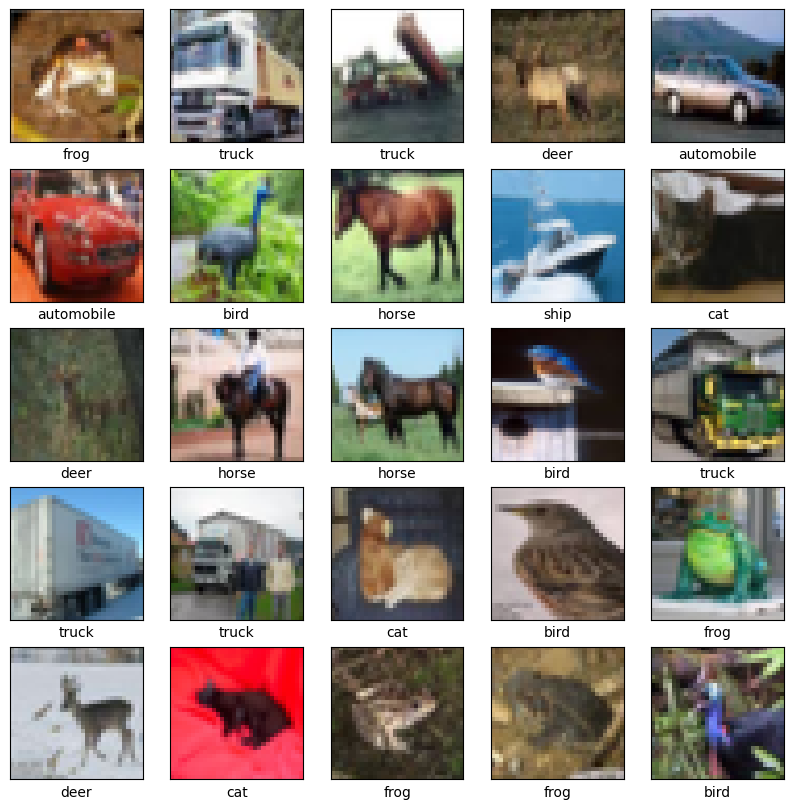

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Buat figure (gambar) berukuran 10x10
plt.figure(figsize=(10,10))

# Loop untuk menampilkan 25 gambar
for i in range(25):
    # Atur posisi subplot dan hapus grid
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Hapus label sumbu x
    plt.yticks([]) # Hapus label sumbu y
    plt.grid(False) # Matikan grid pada gambar

    # Tampilkan gambar pada indeks ke-i dari train_images
    plt.imshow(train_images[i])

    # Label sumbu x adalah nama kelas berdasarkan train_labels
    # CIFAR labels berupa array, sehingga membutuhkan indeks tambahan
    plt.xlabel(class_names[train_labels[i][0]])

# Tampilkan gambar
plt.show()

## Langkah 4 - Buat Model CNN

**Langkah 4.1. - Buat Layer Konvolusi**

In [24]:
model = models.Sequential()  # Membuat model Sequential baru

# Menambahkan layer Conv2D dengan 32 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
# Input shape diatur sebagai (32, 32, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Menambahkan layer MaxPooling2D dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer MaxPooling2D dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Conv2D dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [25]:
# Mendapatkan ringkasan dari arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [26]:
model.add(layers.Flatten())  # Meratakan output dari layer sebelumnya menjadi vektor satu dimensi.
model.add(layers.Dense(64, activation='relu'))  # Menambahkan layer Dense dengan 64 unit dan fungsi aktivasi ReLU.
model.add(layers.Dense(10))  # Menambahkan layer Dense dengan 10 unit, tanpa fungsi aktivasi (linier).

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**Langkah 4.5. - Compile Model CNN**

In [28]:
model.compile(
    optimizer='adam',  # Menggunakan algoritma optimasi Adam untuk menyesuaikan bobot model.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Menggunakan fungsi kerugian Sparse Categorical Crossentropy.
    metrics=['accuracy']  # Menggunakan metrik akurasi untuk mengevaluasi performa model.
)

**Langkah 5 - Fit Model**

In [29]:
history = model.fit(
    train_images, train_labels,  # Data pelatihan yang digunakan untuk melatih model.
    epochs=10,  # Jumlah epoch (iterasi) yang digunakan saat melatih model.
    validation_data=(test_images, test_labels)  # Data validasi untuk mengevaluasi model setelah setiap epoch.
)

Epoch 1/10
1563/1563 [==============================] - 112s 70ms/step - loss: 1.5114 - accuracy: 0.4487 - val_loss: 1.2399 - val_accuracy: 0.5510
Epoch 2/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.1484 - accuracy: 0.5920 - val_loss: 1.1611 - val_accuracy: 0.5952
Epoch 3/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.9959 - accuracy: 0.6512 - val_loss: 0.9715 - val_accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8979 - accuracy: 0.6858 - val_loss: 0.9063 - val_accuracy: 0.6796
Epoch 5/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.8297 - accuracy: 0.7078 - val_loss: 1.0232 - val_accuracy: 0.6516
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7742 - accuracy: 0.7294 - val_loss: 0.8699 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7226 - accuracy: 0.7451 - val_loss: 0

**Langkah 6 - Evaluasi Model**

313/313 - 5s - loss: 0.8893 - accuracy: 0.7076 - 5s/epoch - 15ms/step


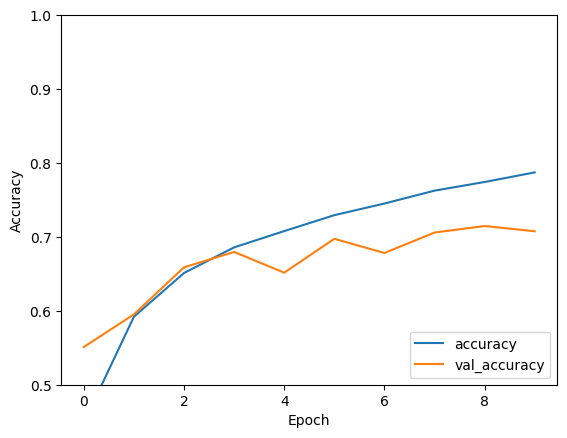

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')  # Plotting akurasi pada data pelatihan terhadap epoch.
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plotting akurasi pada data validasi terhadap epoch.
plt.xlabel('Epoch')  # Label pada sumbu X menunjukkan jumlah epoch.
plt.ylabel('Accuracy')  # Label pada sumbu Y menunjukkan nilai akurasi.
plt.ylim([0.5, 1])  # Rentang nilai pada sumbu Y (akurasi) dari 0.5 hingga 1.
plt.legend(loc='lower right')  # Menampilkan legenda pada lokasi pojok kanan bawah.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # Evaluasi performa model pada data pengujian.

**Langkah 7 - Cetak Hasil Akurasi**

In [31]:
print(test_acc)

0.7075999975204468


## Tugas

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

Epoch 1/25
1563/1563 [==============================] - 118s 74ms/step - loss: 1.5905 - accuracy: 0.4106 - val_loss: 1.3236 - val_accuracy: 0.5208
Epoch 2/25
1563/1563 [==============================] - 115s 74ms/step - loss: 1.1941 - accuracy: 0.5767 - val_loss: 1.0359 - val_accuracy: 0.6391
Epoch 3/25
1563/1563 [==============================] - 112s 71ms/step - loss: 1.0203 - accuracy: 0.6411 - val_loss: 0.9629 - val_accuracy: 0.6636
Epoch 4/25
1563/1563 [==============================] - 112s 72ms/step - loss: 0.9179 - accuracy: 0.6797 - val_loss: 0.9194 - val_accuracy: 0.6801
Epoch 5/25
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8414 - accuracy: 0.7062 - val_loss: 0.8524 - val_accuracy: 0.7062
Epoch 6/25
1563/1563 [==============================] - 113s 72ms/step - loss: 0.7817 - accuracy: 0.7267 - val_loss: 0.8848 - val_accuracy: 0.6970
Epoch 7/25
1563/1563 [==============================] - 112s 72ms/step - loss: 0.7302 - accuracy: 0.7472 - val_loss: 0

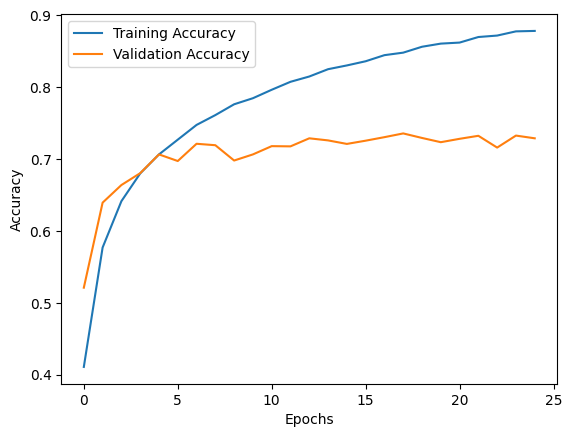

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Muat dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalisasi nilai pixel menjadi antara 1 dan 0
train_images, test_images = train_images / 255.0, test_images / 255.0

# Tentukan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels))

# Tampilkan nilai akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
import tensorflow as tf

# Muat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi nilai piksel menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data agar sesuai dengan model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Tentukan model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 86s 45ms/step - loss: 0.1246 - accuracy: 0.9617 - val_loss: 0.0494 - val_accuracy: 0.9837
Epoch 2/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0367 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0271 - val_accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0263 - val_accuracy: 0.9921
